# Diabetes Prediction using Logistic Regression

Name : Altaf Bin Sarfraz,
Registered mail id for Smartinternz: altafsarfraz36@gmail.com
DOS: 09/08/2020

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset =pd.read_csv(r"D:\SmartBridge_Intern\diabetes.csv")

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


# Data Preprocessing 

In [4]:
del dataset['SkinThickness']

In [5]:
dataset

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,0,33.6,0.627,50,pos
1,1,85,66,0,26.6,0.351,31,neg
2,8,183,64,0,23.3,0.672,32,pos
3,1,89,66,94,28.1,0.167,21,neg
4,0,137,40,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,neg
764,2,122,70,0,36.8,0.340,27,neg
765,5,121,72,112,26.2,0.245,30,neg
766,1,126,60,0,30.1,0.349,47,pos


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

# Handling Missing Values 

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [9]:
dataset['Diabetes'].value_counts()

neg    500
pos    268
Name: Diabetes, dtype: int64

# Performing EDA

Text(0.5, 1.0, 'Glucose level of different Reportees')

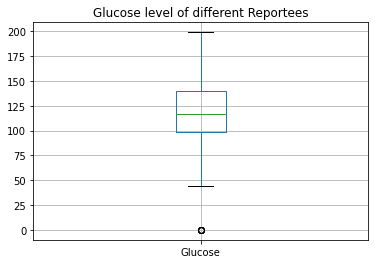

In [10]:
dataset.boxplot(column='Glucose')
plt.title("Glucose level of different Reportees")

Text(0.5, 1.0, 'Blood Pressure of Reportees')

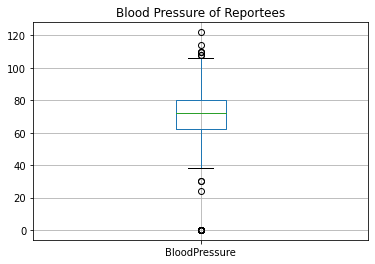

In [11]:
dataset.boxplot(column='BloodPressure')
plt.title("Blood Pressure of Reportees")

Text(0.5, 1.0, 'BMI of Reportees')

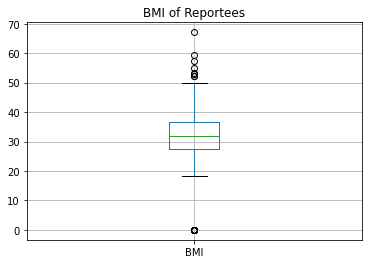

In [12]:
dataset.boxplot(column='BMI')
plt.title("BMI of Reportees")

Text(0.5, 1.0, 'Diabetes Pedigree Function of Reportees')

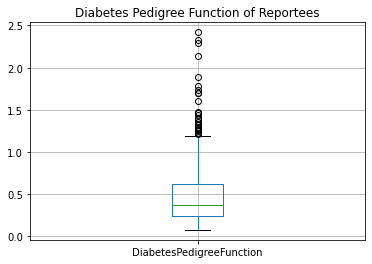

In [13]:
dataset.boxplot(column='DiabetesPedigreeFunction')
plt.title("Diabetes Pedigree Function of Reportees")

In [14]:
x= dataset.iloc[:,0:7].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
y=dataset.iloc[:,7:8].values
y

array([['pos'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['pos'],
       ['pos'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['pos'],
       ['pos'],
       ['pos'],
       ['pos'],
       ['pos'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['neg'],
       ['pos'],
       ['pos'],
       ['pos'],
       ['pos'],
       ['pos'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['pos'],
       ['pos'],
       ['pos'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['neg'],
       ['pos'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['neg'],
       ['pos'],
       [

In [16]:
x.ndim

2

In [17]:
y.ndim

2

In [18]:
x.shape

(768, 7)

In [19]:
y.shape

(768, 1)

# Encoding Categorical Text Varibles

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lb= LabelEncoder()
y[:,0]=lb.fit_transform(y[:,0])

In [22]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [23]:
y=y.astype('int')

In [24]:
y.ndim

2

In [25]:
y.shape

(768, 1)

# Train Test Split 

In [26]:
from sklearn.model_selection import train_test_split               
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)   

In [27]:
x_train

array([[7.00e+00, 1.50e+02, 7.80e+01, ..., 3.52e+01, 6.92e-01, 5.40e+01],
       [4.00e+00, 9.70e+01, 6.00e+01, ..., 2.82e+01, 4.43e-01, 2.20e+01],
       [0.00e+00, 1.65e+02, 9.00e+01, ..., 5.23e+01, 4.27e-01, 2.30e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [28]:
y_train

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [29]:
x_train.shape

(614, 7)

In [30]:
y_train.shape

(614, 1)

# Building the model by applying the training dataset to LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
pipe = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [32]:
pipe.fit(x_train,y_train)

C:\Users\HP\miniconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('rescale', StandardScaler()),
                ('classifier', LogisticRegression())])

In [33]:
y_pred=pipe.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# Checking Accuracy Score

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8246753246753247

Accuracy Score = 0.8246
82.46%

# Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[98,  9],
       [18, 29]], dtype=int64)

In [36]:
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.7664545635315172

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

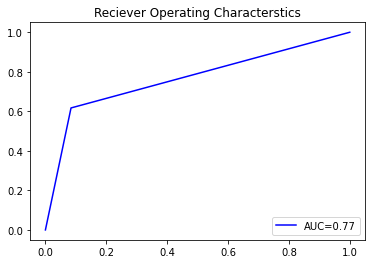

In [37]:
plt.title('Reciever Operating Characterstics')
plt.plot(fpr,tpr, 'b', label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot